In [94]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier, \
    StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
sns.set()

Aprendizaje supervisado tipo clasificación binaria.

Predecir si un cliente abandona sí o no el servicio ofrecido por una TELCO.

## Cargar dataset

In [95]:
df = pd.read_csv('../data/churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [96]:
df.shape

(7032, 21)

## EDAs

<AxesSubplot:xlabel='Churn', ylabel='count'>

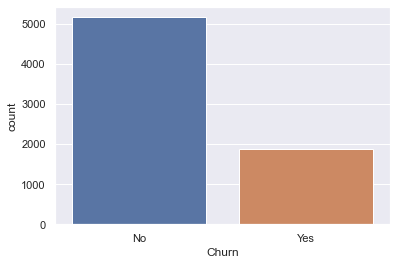

In [97]:
sns.countplot(data=df, x='Churn')

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

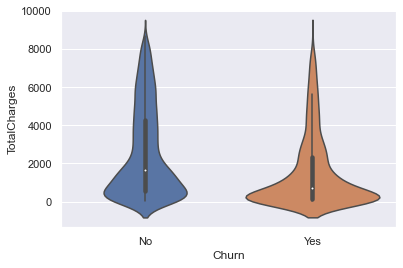

In [98]:
sns.violinplot(data=df, x='Churn', y='TotalCharges')

<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

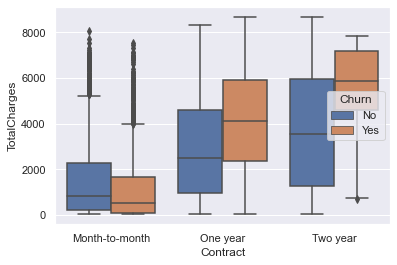

In [99]:
sns.boxplot(data=df, x='Contract', y='TotalCharges', hue='Churn')

In [100]:
# pd.get_dummies(df.drop('customerID', axis=1), drop_first=True)
pd.get_dummies(df.drop('customerID', axis=1))

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,1,0,1,0,0,0,0,1,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,0,1,0,1,0,1,...,1,0,0,1,0,0,0,1,1,0
7028,0,72,103.20,7362.90,1,0,0,1,0,1,...,1,0,0,1,0,1,0,0,1,0
7029,0,11,29.60,346.45,1,0,0,1,0,1,...,0,0,0,1,0,0,1,0,1,0
7030,1,4,74.40,306.60,0,1,0,1,1,0,...,0,0,0,1,0,0,0,1,0,1


### Correlación

In [101]:
df_corr = pd.get_dummies(df.drop('customerID', axis=1)).corr()
df_corr

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,0.001819,-0.001819,-0.016957,0.016957,0.210550,-0.210550,...,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987,-0.150541,0.150541
tenure,0.015683,1.000000,0.246862,0.825880,-0.005285,0.005285,-0.381912,0.381912,-0.163386,0.163386,...,0.202338,0.563801,-0.004823,0.004823,0.243822,0.232800,-0.210197,-0.232181,0.354049,-0.354049
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.013779,-0.013779,-0.097825,0.097825,0.112343,-0.112343,...,0.004810,-0.073256,-0.351930,0.351930,0.042410,0.030055,0.271117,-0.376568,-0.192858,0.192858
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.000048,0.000048,-0.319072,0.319072,-0.064653,0.064653,...,0.170569,0.358036,-0.157830,0.157830,0.186119,0.182663,-0.060436,-0.294708,0.199484,-0.199484
gender_Female,0.001819,-0.005285,0.013779,-0.000048,1.000000,-1.000000,-0.001379,0.001379,0.010349,-0.010349,...,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199,-0.008545,0.008545
gender_Male,-0.001819,0.005285,-0.013779,0.000048,-1.000000,1.000000,0.001379,-0.001379,-0.010349,0.010349,...,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199,0.008545,-0.008545
Partner_No,-0.016957,-0.381912,-0.097825,-0.319072,-0.001379,0.001379,1.000000,-1.000000,0.452269,-0.452269,...,-0.083067,-0.247334,-0.013957,0.013957,-0.111406,-0.082327,0.083207,0.096948,-0.149982,0.149982
Partner_Yes,0.016957,0.381912,0.097825,0.319072,0.001379,-0.001379,-1.000000,1.000000,-0.452269,0.452269,...,0.083067,0.247334,0.013957,-0.013957,0.111406,0.082327,-0.083207,-0.096948,0.149982,-0.149982
Dependents_No,0.210550,-0.163386,0.112343,-0.064653,0.010349,-0.010349,0.452269,-0.452269,1.000000,-1.000000,...,-0.069222,-0.201699,-0.110131,0.110131,-0.052369,-0.061134,0.149274,-0.056448,-0.163128,0.163128
Dependents_Yes,-0.210550,0.163386,-0.112343,0.064653,-0.010349,0.010349,-0.452269,0.452269,-1.000000,1.000000,...,0.069222,0.201699,0.110131,-0.110131,0.052369,0.061134,-0.149274,0.056448,0.163128,-0.163128


In [102]:
df_corr['Churn_No'].sort_values().iloc[1:-1]

Contract_Month-to-month                   -0.404565
OnlineSecurity_No                         -0.342235
TechSupport_No                            -0.336877
InternetService_Fiber optic               -0.307463
PaymentMethod_Electronic check            -0.301455
OnlineBackup_No                           -0.267595
DeviceProtection_No                       -0.252056
MonthlyCharges                            -0.192858
PaperlessBilling_Yes                      -0.191454
Dependents_No                             -0.163128
SeniorCitizen                             -0.150541
Partner_No                                -0.149982
StreamingMovies_No                        -0.130920
StreamingTV_No                            -0.128435
StreamingTV_Yes                           -0.063254
StreamingMovies_Yes                       -0.060860
MultipleLines_Yes                         -0.040033
PhoneService_Yes                          -0.011691
gender_Female                             -0.008545
gender_Male 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 [Text(0, 0, 'Contract_Month-to-month'),
  Text(1, 0, 'OnlineSecurity_No'),
  Text(2, 0, 'TechSupport_No'),
  Text(3, 0, 'InternetService_Fiber optic'),
  Text(4, 0, 'PaymentMethod_Electronic check'),
  Text(5, 0, 'OnlineBackup_No'),
  Text(6, 0, 'DeviceProtection_No'),
  Text(7, 0, 'MonthlyCharges'),
  Text(8, 0, 'PaperlessBilling_Yes'),
  Text(9, 0, 'Dependents_No'),
  Text(10, 0, 'SeniorCitizen'),
  Text(11, 0, 'Partner_No'),
  Text(12, 0, 'StreamingMovies_No'),
  Text(13, 0, 'StreamingTV_No'),
  Text(14, 0, 'StreamingTV_Yes'),
  Text(15, 0, 'StreamingMovies_Yes'),
  Text(16, 0, 'MultipleLines_Yes'),
  Text(17, 0, 'PhoneService_Yes'),
  Text(18, 0, 'gender_Female'),
  Text(19, 0, 'gender_Male'),
  Text(20, 0, 'MultipleLines_No phone service'),
  Text(21, 0, 'PhoneService_No'),
  T

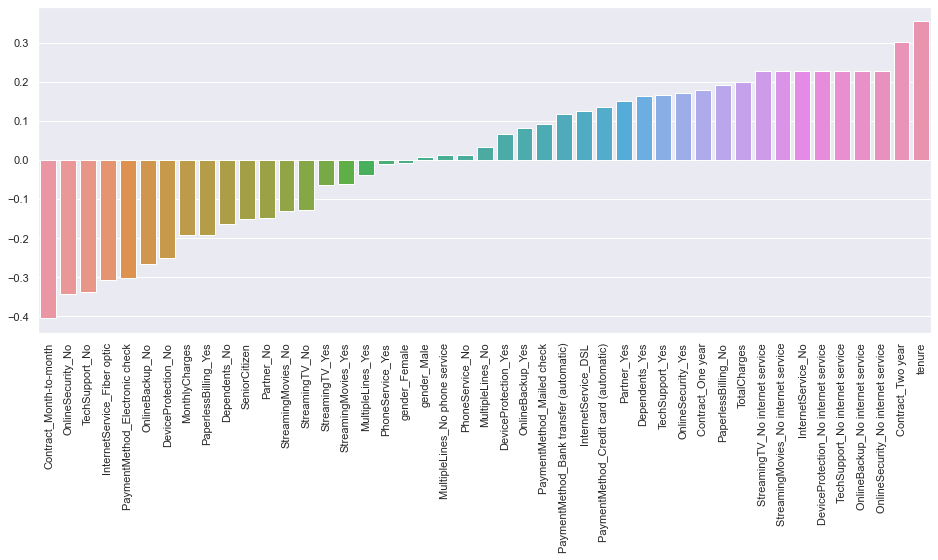

In [103]:
plt.figure(figsize=(16,6))
sns.barplot(
    x=df_corr['Churn_No'].sort_values().iloc[1:-1].index,
    y=df_corr['Churn_No'].sort_values().iloc[1:-1].values
)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 [Text(0, 0, 'tenure'),
  Text(1, 0, 'Contract_Two year'),
  Text(2, 0, 'InternetService_No'),
  Text(3, 0, 'StreamingTV_No internet service'),
  Text(4, 0, 'TechSupport_No internet service'),
  Text(5, 0, 'DeviceProtection_No internet service'),
  Text(6, 0, 'OnlineBackup_No internet service'),
  Text(7, 0, 'OnlineSecurity_No internet service'),
  Text(8, 0, 'StreamingMovies_No internet service'),
  Text(9, 0, 'TotalCharges'),
  Text(10, 0, 'PaperlessBilling_No'),
  Text(11, 0, 'Contract_One year'),
  Text(12, 0, 'OnlineSecurity_Yes'),
  Text(13, 0, 'TechSupport_Yes'),
  Text(14, 0, 'Dependents_Yes'),
  Text(15, 0, 'Partner_Yes'),
  Text(16, 0, 'PaymentMethod_Credit card (automatic)'),
  Text(17, 0, 'InternetService_DSL'),
  Text(18, 0, 'PaymentMethod_Bank transfer (automatic)'),
  

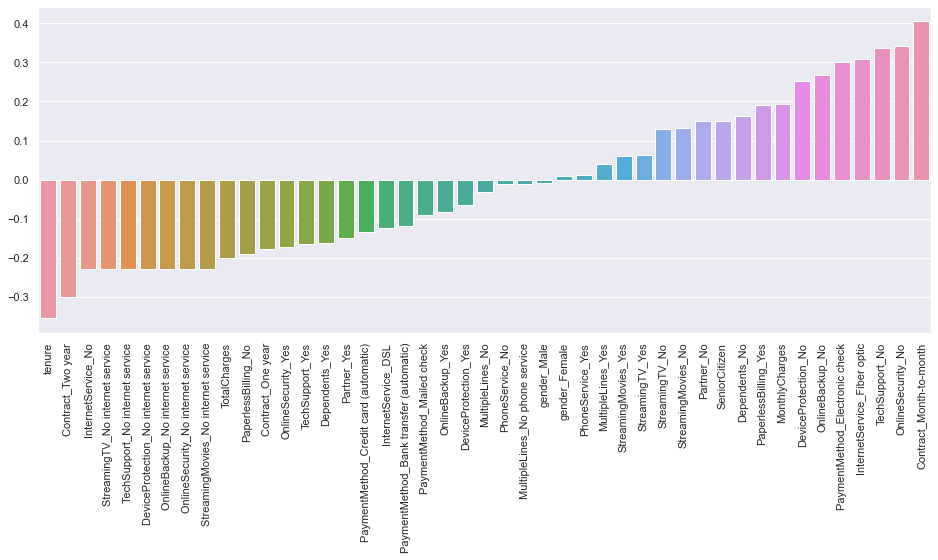

In [104]:
plt.figure(figsize=(16,6))
sns.barplot(
    x=df_corr['Churn_Yes'].sort_values().iloc[1:-1].index,
    y=df_corr['Churn_Yes'].sort_values().iloc[1:-1].values
)
plt.xticks(rotation=90)

In [105]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [106]:
df['tenure'].sort_values().head()

0       1
6624    1
4283    1
6614    1
1366    1
Name: tenure, dtype: int64

In [107]:
df['tenure'].sort_values().tail()

912     72
915     72
4566    72
5611    72
3537    72
Name: tenure, dtype: int64

<AxesSubplot:xlabel='tenure', ylabel='Count'>

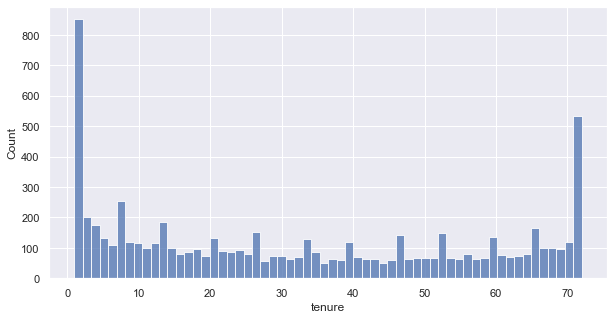

In [108]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='tenure',bins=60)

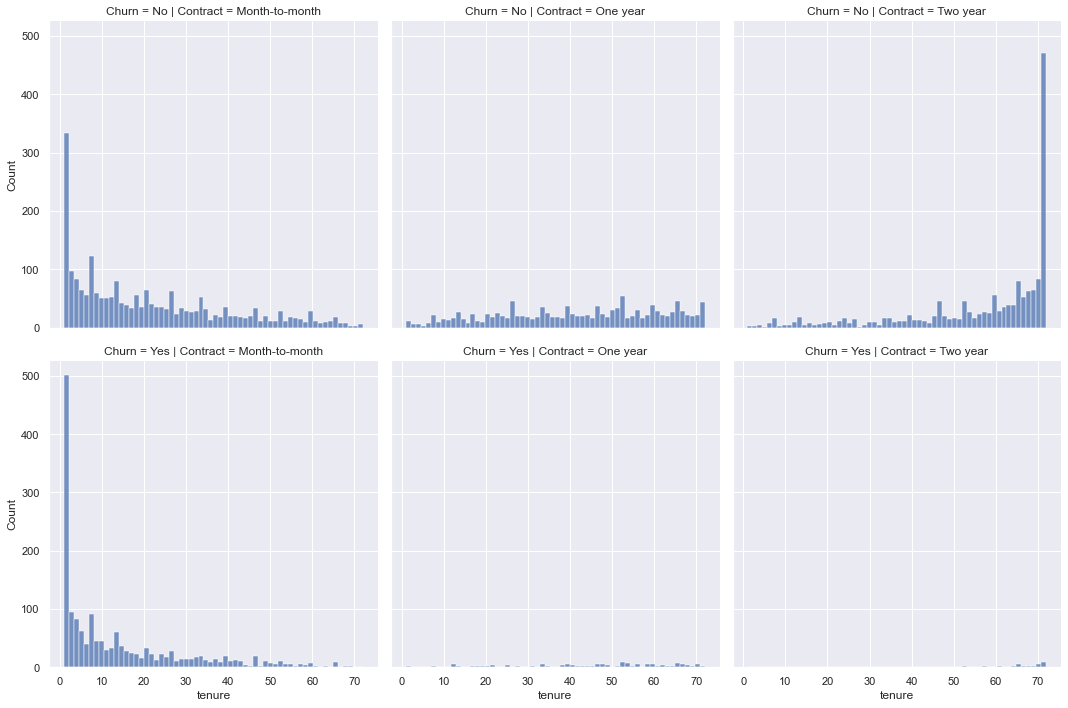

In [109]:
sns.displot(data=df, x='tenure', bins=60, col='Contract', row='Churn')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

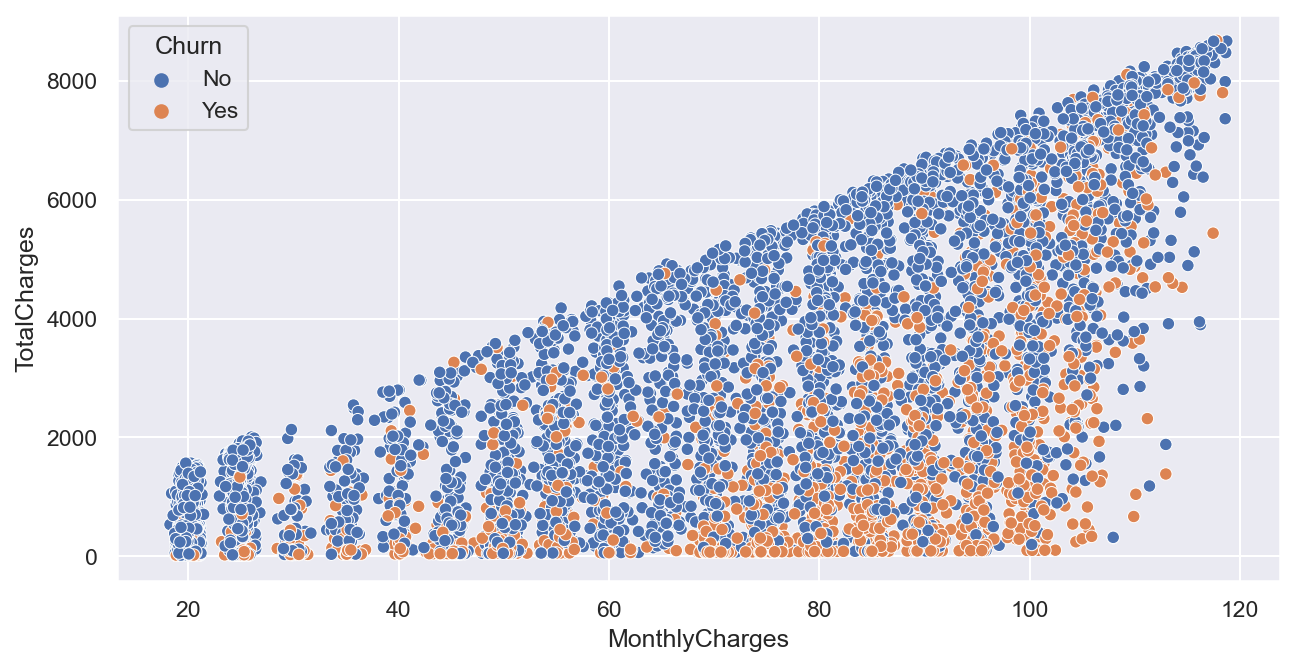

In [110]:
plt.figure(figsize=(10,5), dpi=(150))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn')

In [111]:
df['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7027    24
7028    72
7029    11
7030     4
7031    66
Name: tenure, Length: 7032, dtype: int64

In [112]:
def group_tenure(tenure):
    if tenure <= 12:
        return '1-12 Months'
    elif tenure <= 24:
        return '12-24 Months'
    elif tenure <= 48:
        return '24-48 Months'
    else:
        return '> 48 Months'

In [113]:
# Aplicar una transformación y guardar el resultado en una nueva columna
df['tenure_group'] = df['tenure'].apply(group_tenure)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12 Months
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24-48 Months
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12 Months
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,24-48 Months
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12 Months


<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

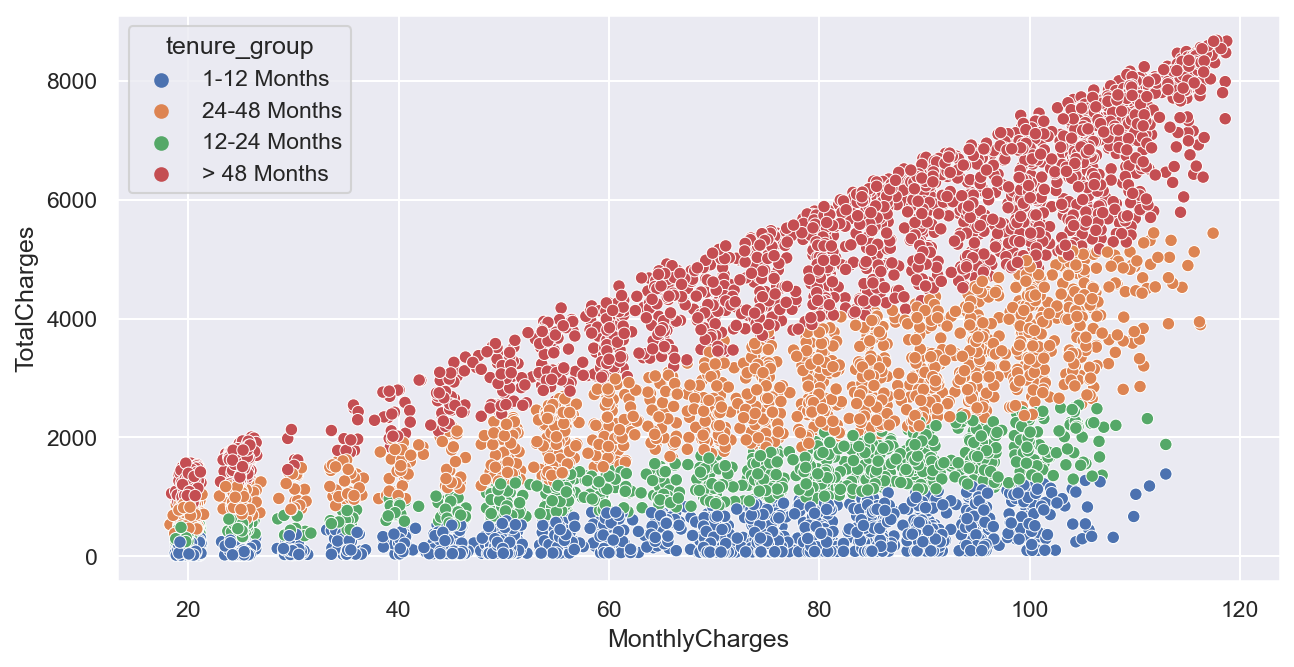

In [114]:
plt.figure(figsize=(10,5), dpi=(150))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='tenure_group')

<AxesSubplot:xlabel='tenure_group', ylabel='count'>

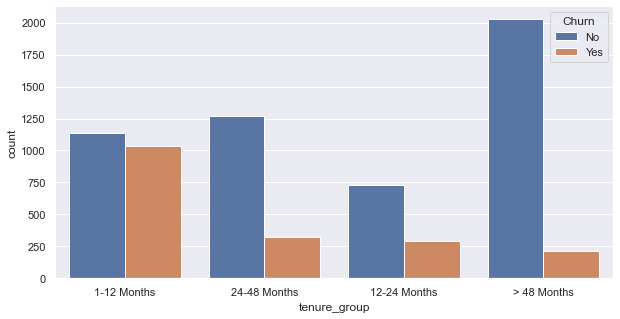

In [115]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='tenure_group', hue='Churn')

<Figure size 720x360 with 0 Axes>

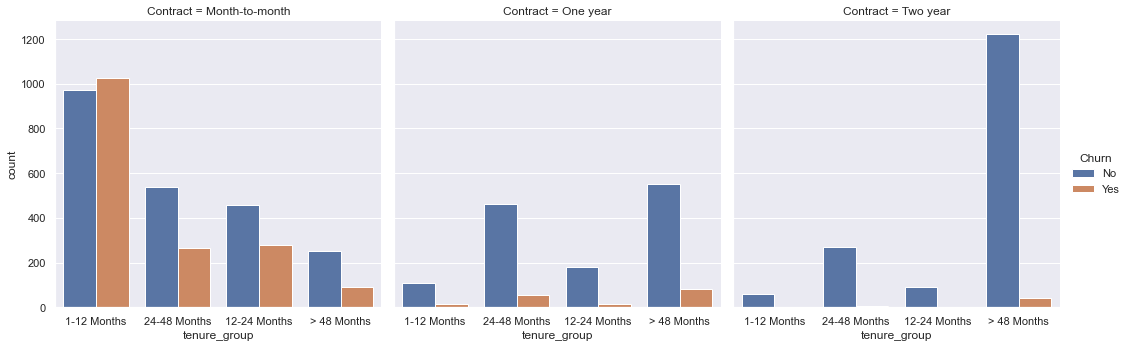

In [116]:
plt.figure(figsize=(10,5))
sns.catplot(data=df, kind='count', x='tenure_group', col='Contract', hue='Churn')

## Modelado

Modelado con los distintos algoritmos. Guardar los resultados de cada uno en un dataframe para contrastarlos.


In [117]:
df = pd.read_csv('../data/churn.csv')
X = pd.get_dummies(df.drop(['customerID', 'Churn'], axis=1), drop_first=True)
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [118]:
y = df['Churn'].map({
    'No': 0,
    'Yes': 1
})
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [120]:
model = DecisionTreeClassifier(max_depth=8)
model.fit(X_train, y_train)
df_imp = pd.DataFrame(data=model.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
df_imp

,Importance
tenure,0.336652
InternetService_Fiber optic,0.251048
TotalCharges,0.129378
MonthlyCharges,0.088643
Contract_One year,0.028368
PaymentMethod_Electronic check,0.021268
StreamingTV_No internet service,0.018304
OnlineSecurity_Yes,0.017464
Contract_Two year,0.013424
PaperlessBilling_Yes,0.011927


Text(0.5, 1.0, 'Feature importances')

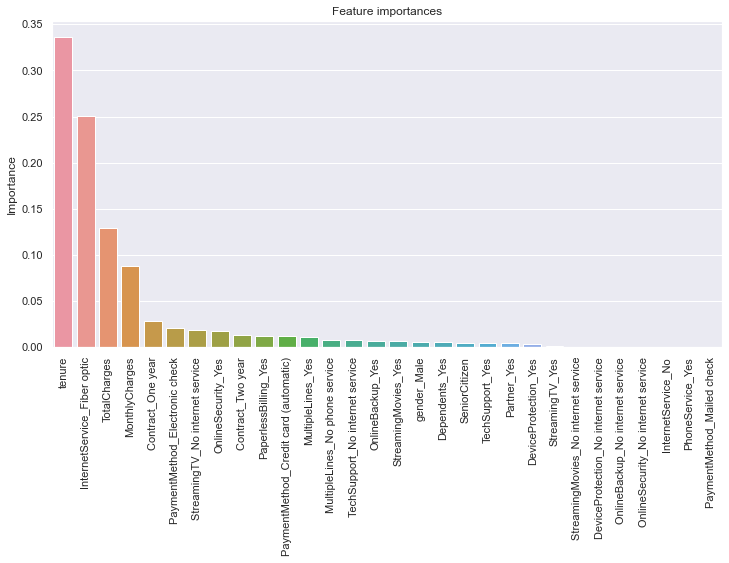

In [121]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_imp, x=df_imp.index, y='Importance')
plt.xticks(rotation=90)
plt.title('Feature importances')

In [122]:

df_results = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall_sensitivity', 'recall_specificity', 'f1', 'auc'])

def calc_predictions(model):

    # entrenamiento y predicciones
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # classification metrics
    model_name = model.__class__.__name__
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall_sensitivity = recall_score(y_test, y_pred)
    recall_specificity = recall_score(y_test, y_pred, pos_label=0)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    # guardar resultados
    row = [model_name, accuracy, precision, recall_sensitivity, recall_specificity, f1, auc]
    df_results.loc[len(df_results)] = row


### 1. Bagging

In [123]:
model = BaggingClassifier()
calc_predictions(model)

In [124]:
model = RandomForestClassifier()
calc_predictions(model)

In [125]:
model = ExtraTreesClassifier()
calc_predictions(model)

#### Voting

In [126]:
estimators = []

In [127]:
model_lr = LogisticRegression(max_iter=10000)
calc_predictions(model_lr)

estimators.append(('lr', model_lr))

In [128]:
model_knn = KNeighborsClassifier(n_neighbors=10)
calc_predictions(model_knn)

estimators.append(('knn', model_knn))

In [129]:
model_svc = SVC(class_weight='balanced')
calc_predictions(model_svc)

estimators.append(('svc', model_svc))

In [130]:
model_cart = DecisionTreeClassifier()
calc_predictions(model_cart)

estimators.append(('cart', model_cart))

In [131]:
model_voting = VotingClassifier(estimators)
calc_predictions(model_voting)

### 2. Boosting

In [132]:
model = AdaBoostClassifier()
calc_predictions(model)

In [133]:
model = GradientBoostingClassifier()
calc_predictions(model)

### 3. Stacking

In [134]:
estimators = [
    ('lr', LogisticRegression(max_iter=10000)),
    ('knn', KNeighborsClassifier()),
    ('svc', SVC(class_weight='balanced')),
    ('cart', DecisionTreeClassifier())
]

final_estimator = RandomForestClassifier()

In [135]:
model_stacking = StackingClassifier(estimators, final_estimator)
calc_predictions(model_stacking)

### Resultados

In [136]:
df_results.sort_values('f1', ascending=False)

,model_name,accuracy,precision,recall_sensitivity,recall_specificity,f1,auc
8,AdaBoostClassifier,0.794084,0.627660,0.515284,0.892308,0.565947,0.703796
9,GradientBoostingClassifier,0.791809,0.627072,0.495633,0.896154,0.553659,0.695894
3,LogisticRegression,0.786689,0.608924,0.506550,0.885385,0.553039,0.695967
1,RandomForestClassifier,0.789534,0.625000,0.480349,0.898462,0.543210,0.689405
2,ExtraTreesClassifier,0.770762,0.574124,0.465066,0.878462,0.513872,0.671764
10,StackingClassifier,0.763936,0.556136,0.465066,0.869231,0.506540,0.667148
0,BaggingClassifier,0.772469,0.582386,0.447598,0.886923,0.506173,0.667261
7,VotingClassifier,0.790102,0.684647,0.360262,0.941538,0.472103,0.650900
6,DecisionTreeClassifier,0.712173,0.450413,0.475983,0.795385,0.462845,0.635684
5,SVC,0.672924,0.404255,0.539301,0.720000,0.462114,0.629651


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'SVC'),
  Text(1, 0, 'DecisionTreeClassifier'),
  Text(2, 0, 'StackingClassifier'),
  Text(3, 0, 'ExtraTreesClassifier'),
  Text(4, 0, 'BaggingClassifier'),
  Text(5, 0, 'KNeighborsClassifier'),
  Text(6, 0, 'LogisticRegression'),
  Text(7, 0, 'RandomForestClassifier'),
  Text(8, 0, 'VotingClassifier'),
  Text(9, 0, 'GradientBoostingClassifier'),
  Text(10, 0, 'AdaBoostClassifier')])

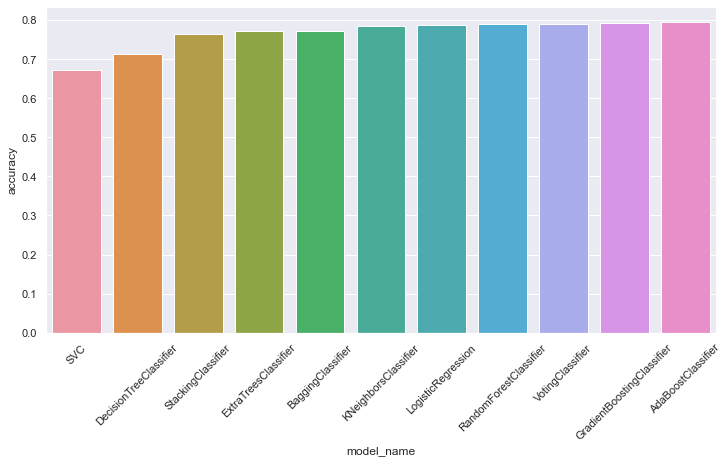

In [145]:
plt.figure(figsize=(12,6))
chart = sns.barplot(data=df_results.sort_values('accuracy'), x='model_name', y='accuracy')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'SVC'),
  Text(1, 0, 'DecisionTreeClassifier'),
  Text(2, 0, 'StackingClassifier'),
  Text(3, 0, 'ExtraTreesClassifier'),
  Text(4, 0, 'BaggingClassifier'),
  Text(5, 0, 'KNeighborsClassifier'),
  Text(6, 0, 'LogisticRegression'),
  Text(7, 0, 'RandomForestClassifier'),
  Text(8, 0, 'VotingClassifier'),
  Text(9, 0, 'GradientBoostingClassifier'),
  Text(10, 0, 'AdaBoostClassifier')])

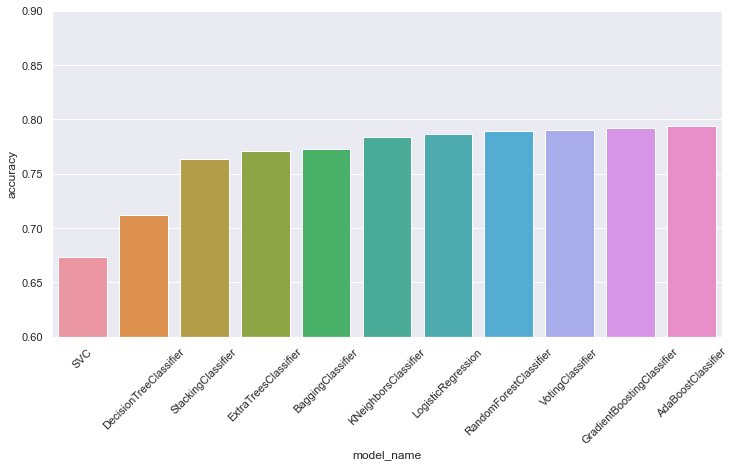

In [151]:
plt.figure(figsize=(12,6))
chart = sns.barplot(data=df_results.sort_values('accuracy'), x='model_name', y='accuracy')
chart.set(ylim=(0.6, 0.9)) # zoom
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'KNeighborsClassifier'),
  Text(1, 0, 'SVC'),
  Text(2, 0, 'DecisionTreeClassifier'),
  Text(3, 0, 'VotingClassifier'),
  Text(4, 0, 'BaggingClassifier'),
  Text(5, 0, 'StackingClassifier'),
  Text(6, 0, 'ExtraTreesClassifier'),
  Text(7, 0, 'RandomForestClassifier'),
  Text(8, 0, 'LogisticRegression'),
  Text(9, 0, 'GradientBoostingClassifier'),
  Text(10, 0, 'AdaBoostClassifier')])

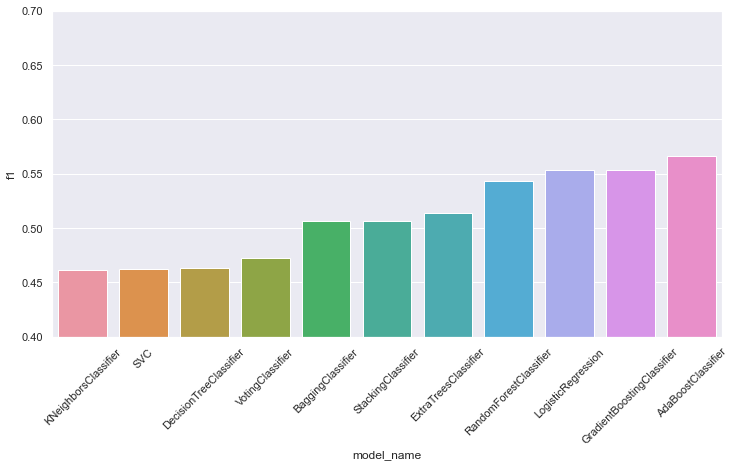

In [152]:
plt.figure(figsize=(12,6))
chart = sns.barplot(data=df_results.sort_values('f1'), x='model_name', y='f1')
chart.set(ylim=(0.4, 0.7)) # zoom
plt.xticks(rotation=45)